# Desafio de Ensembles: Previsão de _Churn_ de Clientes

___


### Allan Almeida Dieguez

> #### Tera / Luizalabs

#### Junho de 2021

___


# Contexto do Desafio



## *Churn* de Clientes

O desafio de prever se um cliente irá sair da Base de Clientes Ativos (também conhecido como *churn*) não é um problema exclusivo do varejo, sendo uma área de estudos constante da maioria das indústrias e empresas de serviços que dependem da retenção. 

Esse é um exemplo do tipo de problema que um cientista do *Chapter* de Ciência de Dados do Luizalabs entra de cabeça e cujas soluções servem para alavancar várias frentes de trabalho. A solução em si já traz muito valor, se tiver alto índice de acertos pode ser usada para elencar automaticamente clientes com alto risco de *churn* para uma promoção agressiva com o objetivo retê-lo na base. 

Também há muito valor nos *insights* e na validação de hipóteses que acontece durante o processo de análise do problema e das soluções. Pode-se verificar através de experimentação que, por exemplo, um cliente que compra exclusivamente em datas especiais ou eventos promocionais tem uma chance menor de ser um *churn* do que um que compra grandes volumes do mesmo produto. 

## Objetivos do Desafio

Nesse desafio, construído em uma parceria da **Tera** e o **Luizalabs**, o **objetivo principal** será construir algumas soluções baseadas em *machine learning* para prever se um dado cliente do *e-commerce* do **Magalu** continuará comprando na plataforma em 2020 usando algumas características próprias do cliente e seu histórico de compras no ano anterior. No final, algumas dessas soluções devem ser combinadas em um *ensemble* para criar uma solução única com o objetivo de alavancar ainda mais os resultados.

Para que o **objetivo principal** seja cumprido, será necessário construir uma forma de visualização das soluções criadas e a comparação com o **modelo _baseline_** e com o **modelo de _ensemble_** criados no processo. O formato sugerido é um **tabela de resultados** contendo as métricas de sucesso de cada modelo criado.

O **objetivo secundário** é o levantamento de hipóteses e *insights* que surgirem durante as experimentações. É interessante fazer isso desde o início como parte da análise exploratória, documentando qualquer indício de informação nova sobre o problema. Também é uma boa prática avaliar os modelos treinados, seja através da exploração de seus parâmetros (por exemplo, os pesos de um modelo linear) ou usando técnicas avançadas como o [SHAP](https://www.kaggle.com/dansbecker/shap-values), buscando relacionar como as _features_ influenciam as respostas do modelo.

A forma mais simples de cumprir o **objetivo secundário** é a documentação das etapas de análise e exploração de forma resumida em um relatório que compila as principais hipóteses e _insights_. Esse relatório pode ser um documento de texto na forma de um **diário de bordo** ou mesmo uma **seção do próprio notebook** em que a solução foi desenvolvida.

## Pontuação no Desafio

O desafio também possui um **_dataset_ de pontuação**, contendo dados de clientes que não estão nem nas bases de treino nem nas de teste. Para esses clientes não foram disponibilizadas as respostas (_targets_), sendo portanto impossível verificar durante o desenvolvimento da solução se o modelo está acertando ou não. 

O objetivo desse _dataset_ é permitir, de forma justa, que os alunos possam comparar suas melhores soluções com as dos outros. Através desse [_link_](https://forms.gle/9Vb4VDVejXLz6wi67) é possível fazer o envio do **arquivo de respostas** do desafio. No fim do desafio, será mostrado o _ranking_ dos envios dos alunos. 

_Let the Games Begin!_ =

# Base de Dados

Todos os dados disponibilizados para esse desafio estão em arquivos no formato **_csv_**, podendo ser baixados para serem trabalhados localmente ou em um notebook do **_Google Colab_** como este aqui. 

Os dados sensíveis ou privados de clientes e produtos estão todos anonimizados, respeitando a privacidade dos mesmos e evitando o vazamento de informações estratégicas da empresa. 

Esses dados anonimizados incluem informações de **IDs de entidades** (clientes, vendas e produtos), os **estados** de origem do cliente e de destino do produto e a **estrutura mercadológica** dos produtos (nomes de categorias e subcategorias às quais pertencem), assim como sua **descrição** (nome do produto incluso).



## Definições de Código

Algumas definições de ambiente serão definidas nessa seção para facilitar o acesso aos dados.

#### Imports

In [187]:
import gdown
import numpy as np
import pandas as pd

### Estrutura de pastas

Criação da estrutura de pastas antes do _download_.

In [188]:
%%bash
if [  -d "data" ]
then 
    echo "folder 'data' already created, do nothing" 
else
    mkdir data
    echo "created 'data' folder"
fi

folder 'data' already created, do nothing


### URLs e Nomes de Arquivos

In [189]:
FILE_INFO = {
    'client_tr': {
        'url':      'https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm',
        'output':   'data/client.train.csv'
    },
    'client_te': {
        'url':      'https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw',
        'output':   'data/client.test.csv'
    },
    'client_ch': {
        'url':      'https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV',
        'output':   'data/client.challenge.csv'
    },
    'orders': {
        'url':      'https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ',
        'output':   'data/orders.csv'
    },
    'product': {
        'url':      'https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ',
        'output':   'data/product.csv'
    }
}

## Descrição das Tabelas e Colunas

Nessa seção serão descritas as tabelas e suas colunas do desafio. Os links para os arquivos e a descrição de cada um está nas seções a seguir. Algumas definições de código e extrações já serão feitas nesse momento, para facilitar o uso dos dados no restante do _notebook_ e para facilitar a explicação de cada elemento.

### Dados de Clientes

Os dados de clientes estão contidos em **3 arquivos** _csv_ já separados em **treino**, **teste** e **desafio**. Isso foi feito previamente para que os três _datasets_ tivessem distribuições justas das **_features_ de interesse**, representando fielmente o domínio do problema.

#### Colunas das Tabelas

As colunas para os três arquivos são:

- `client_id`: ID global único do cliente
- `birthdate`: data de nascimento do cliente
- `state`: estado onde o cliente mora
- `gender`: gênero declarado pelo cliente
- `is_churn`: variável dependente (_target_) que diz se o cliente será _churn_ ou não

#### Dados de Treino: _clients.train.csv_

Os **dados de treino** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [190]:
key = 'client_tr'

In [191]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm
To: /content/data/client.train.csv
100%|██████████| 788k/788k [00:00<00:00, 93.8MB/s]


'data/client.train.csv'

In [192]:

clients_tr = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_tr

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


#### Dados de Teste: _clients.test.csv_

Os **dados de teste** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [193]:
key = 'client_te'

In [194]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw
To: /content/data/client.test.csv
100%|██████████| 263k/263k [00:00<00:00, 59.7MB/s]


'data/client.test.csv'

In [195]:
clients_te = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_te

,birthdate,state,gender,is_churn
client_id,,,,
cx06840,1982-12-03,st15,cg1,False
cx01931,1979-05-09,st15,cg1,False
cx35431,1965-05-09,st15,cg1,False
cx36233,1954-03-15,st15,cg2,False
cx13540,1965-06-19,st15,cg1,False
...,...,...,...,...
cx19119,1980-05-31,st24,cg1,False
cx21963,1984-08-25,st15,cg2,False
cx37195,1960-01-16,st13,cg2,False


#### Dados de Desafio: _clients.challenge.csv_

Os **dados de desafio** estão [neste arquivo](https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV) do _Google Drive_. Interessante notar que está faltando a coluna `is_churn`, que não será fornecida para esse _dataset_.

In [196]:
key = 'client_ch'

In [197]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV
To: /content/data/client.challenge.csv
100%|██████████| 217k/217k [00:00<00:00, 58.3MB/s]


'data/client.challenge.csv'

In [198]:
clients_ch = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_ch

,birthdate,state,gender
client_id,,,
cx12525,1932-04-19,st15,cg1
cx32280,1983-03-01,st15,cg1
cx00471,1964-08-30,st15,cg2
cx18876,1971-04-27,st15,cg2
cx38255,1958-01-26,st15,cg1
...,...,...,...
cx37820,1980-05-01,st04,cg1
cx00770,1964-10-12,st18,cg2
cx01686,1972-07-20,st24,cg2


### Dados de Produtos

Os **dados de produto** estão [neste arquivo](https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ) do _Google Drive_.

In [199]:
key = 'product'

In [200]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ
To: /content/data/product.csv
100%|██████████| 950k/950k [00:00<00:00, 98.1MB/s]


'data/product.csv'

In [201]:
product = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)
product

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


As colunas da Tabela de Produtos são todas simbólicas, representando as diferentes categorias da **árvore de Estrutura Mercadológica** onde o produto está inserido. 

Os nomes das subcategorias herdam o nome da categoria pai, de forma que todas as subcategorias da coluna `category_lv2` que começam com "mk38:072" possuem como categoria pai a `category_lv1` de nome "mk38:072", que por sua vez é filho da `category_lv0` de nome "mk38".

Um exemplo da categorização:

- `category_lv0`: Categorias mais abrangentes dos produtos; e.g. "Eletrônicos" ou "Moda"
- `category_lv1`: Subcategorias; e.g. "Eletrônicos->Notebooks"
- `category_lv2`: Sub-subcategorias; e.g. "Eletrônicos->Notebooks->UltraFinos"

e assim por diante.

A coluna `product_id` é a referência global de produtos, que pode ser combinada por _merge_ com a tabela de vendas.

### Histórico de Vendas

Os **dados do histórico de todas as vendas** de 2019 para **todos os clientes** nos 3 datasets de cliente que compraram qualquer produto - todos contidos no dataset de produtos - estão [neste arquivo](https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ) do _Google Drive_.

In [202]:
key = 'orders'

In [203]:
 gdown.download(**FILE_INFO[key], quiet=0)

Downloading...
From: https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ
To: /content/data/orders.csv
100%|██████████| 13.3M/13.3M [00:00<00:00, 251MB/s]


'data/orders.csv'

In [204]:
orders = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


As colunas dessa tabela estão descritas a seguir.

As colunas de ID de entidade são:
- `order_id`: identificador da venda; pode estar repetida em outras linhas, pois **cada linha corresponde à compra de um produto por um cliente**, que pode ter comprado outros produtos no mesmo evento.
- `client_id`: identificador do cliente que realizou a compra
- `datetime`: data e hora da compra
- `units`: quantidade de unidades do produto que foram comprados nesse evento de compra
- `price`: preço unitário do produto comprado
- `payment_method`: forma de pagamento (crétido, débito, _voucher_, etc) da compra
- `installments`: número de parcelas do pagamento; se estiver vazio, pode-se considerar que não se aplica
- `delivery_days`: prazo de entrega do produto
- `delivery_state`: estado onde ocorreu a entrega do produto; corresponde exatamente ao estado nas tabelas de cliente
- `device`: meio por onde  o cliente comprou; e.g. site, aplicativo do celular, terminal de compras
- `source`: canal de _marketing_ que gerou o _lead_ e ocasionou ao cliente comprar; por exemplo, pode ser um link em uma página parceira onde o cliente viu uma promoção

# Roteiro Sugerido

As etapas a seguir são a sugestão de passos mínima para a solução do problema de forma estruturada. Em alguns passos serão dadas algumas sugestões de código para o melhor aproveitamento do esforço de exploração e construção de solução.

A idéia não é engessar a abordagem, mas apenas criar uma trilha minimamente estruturada para que seja fácil rastrear os passos da solução. O passo inicial será sempre a **análise exploratória** para entender os dados brutos, seguido por um ajuste dos elementos do dataset baseada nas descobertas em uma etapa de **limpeza e pré-processamento** dos dados.

## Análise Exploratória Inicial

O primeiro passo **sempre** deve ser uma boa EDA (ou análise exploratória). Deve-se entender em cada tabela fornecida a distribuição dos dados de cada coluna, o seu tipo e as correlações (no caso de _features_ numéricas) e co-ocorrências (para _features_ categóricas). Sempre é muito importante tentar entender a relação de todas as _features_ disponíveis com a **variável dependente** ou _target_ (no caso, `is_churn`, para entender se há variáveis que já explicam bem o comportamento da saída **antes mesmo de modelar** uma solução.

Sugestão para começar: pegar a tabela de **dados de cliente de treino** `client_tr` e fazer uma exploração das colunas de lá. Depois, buscar fazer uma análise exploratória nas **compras realizadas por esses clientes**, buscando perceber se há alguma relação interessante de comportamento do cliente. Por exemplo, pode-se verificar se o cliente sempre compra produtos para **entregar no mesmo estado em que ele mora**.

Muito importante usar as **técnicas de visualização** como histogramas e tabelas de correlações para ter as idéias certas. Nesses casos, gerar gráficos com as bibliotecas [matplotlib](https://matplotlib.org/) e a [seaborn](https://seaborn.pydata.org/) sempre é muito rico. Quando trabalhar com gráficos, sempre seguir a **regra de ouro**: se um gráfico **não mostra explicitamente o comportamento** que quer observar, a análise por esse gráfico pode não ser interessante, siga adiante para outra visualização.

Mais uma sugestão de feramentas: além da biblioteca `pandas`, as bibliotecas `numpy` e `scikit-learn` também possuem muitas ferramentas de análise interessantes.

In [205]:
''' sugestão de imports '''
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [206]:
#lista as primeiras linhas do DataSet Clients_tr
clients_tr.head()

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False


In [207]:
#Lista os tipos de variáveis - clients_tr
clients_tr.dtypes

birthdate    datetime64[ns]
state                object
gender               object
is_churn               bool
dtype: object

In [208]:
#lista uma contagem por estado
state_tr = clients_tr.state.value_counts()
state_tr

st15    8201
st25    3501
st21    2135
st04    1646
st22    1230
st08    1021
st16     990
st01     786
st03     651
st09     505
st24     477
st02     430
st18     426
st13     356
st26     309
st11     229
st23     203
st12      68
st17      52
st05      36
st06      28
st20       4
st19       2
st14       2
st07       2
st27       1
st10       1
Name: state, dtype: int64

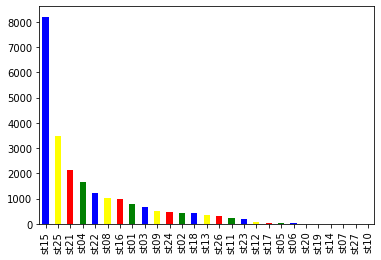

In [209]:
#plotagem da variável state
state_tr.plot.bar(color = ['blue','yellow','red','green'])

Existem mais clientes nos estados:
st15    8201
st25    3501
st21    2135
st04    1646
st22    1230
st08    1021
st16     990

In [210]:
#lista uma contagem por genero
gender_tr = clients_tr.gender.value_counts()
gender_tr

cg1    12879
cg2    10413
Name: gender, dtype: int64

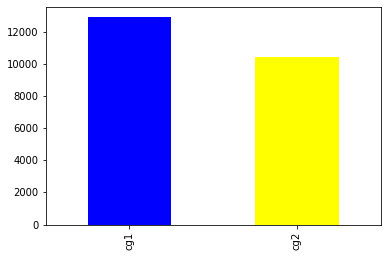

In [211]:
#plotagem da variável gender
gender_tr.plot.bar(color = ['blue','yellow'])

In [212]:
#lista uma contagem por genero
birthdate_tr = clients_tr.birthdate.value_counts()
birthdate_tr

1990-01-01    58
1989-03-04    10
1980-01-01     9
1990-04-11     8
1984-07-29     7
              ..
1949-12-05     1
1956-06-07     1
1963-08-01     1
1992-01-12     1
1950-10-09     1
Name: birthdate, Length: 13046, dtype: int64

In [213]:
# verificando variáveis nulas de clients_tr
clients_tr.isnull().sum()

birthdate    0
state        0
gender       0
is_churn     0
dtype: int64

In [214]:
#lista o DataSet orders
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08


In [215]:
#Lista os tipos de variáveis - orders
orders.dtypes

client_id                 object
product_id                object
datetime          datetime64[ns]
units                    float64
price                    float64
payment_method            object
installments             float64
delivery_days            float64
delivery_state            object
device                    object
source                    object
dtype: object

In [216]:
# verificando variáveis nulas de orders
orders.isnull().sum()

client_id              0
product_id             0
datetime               0
units                  0
price                  0
payment_method         0
installments      131927
delivery_days      78830
delivery_state         0
device                 0
source                 0
dtype: int64

In [217]:
# Verificando se o cliente compra produtos para entregar no mesmo estado
orders_clistate = orders.groupby(['client_id', 'delivery_state'])['delivery_state'].count()
orders_clistate 

client_id  delivery_state
cx00001    st07              3
cx00002    st07              1
cx00003    st07              1
           st21              3
cx00004    st01              7
                            ..
cx38818    st22              5
cx38819    st07              1
cx38820    st15              1
cx38821    st07              3
           st15              1
Name: delivery_state, Length: 45921, dtype: int64

In [218]:
# Valor das compras por estado
orders_valtot = orders.groupby(['delivery_state'])['price'].sum().sort_values(ascending = False)  
orders_valtot

delivery_state
st07    47488709.64
st15     8053264.31
st25     3534835.90
st21     2811811.20
st22     1886890.39
st16     1829814.18
st04     1497609.52
st01     1486787.47
st03     1178208.54
st24      908528.76
st08      886351.38
st26      801173.59
st09      739231.81
st13      654965.46
st18      505449.61
st02      417842.81
st23      416312.93
st11      412721.73
st12      194908.12
st17      140999.60
st05      133476.53
st06       54199.96
st19        5661.98
st27        2188.90
st14        1951.81
st10        1718.10
Name: price, dtype: float64

Os 5 estados que mais gastam são:
st07    47488709.64
st15     8053264.31
st25     3534835.90
st21     2811811.20
st22     1886890.39
st16     1829814.18

In [219]:
#listando uma descrição estatistica da variavel
orders_valtot.describe()

count    2.600000e+01
mean     2.924831e+06
std      9.240875e+06
min      1.718100e+03
25%      1.544767e+05
50%      6.970986e+05
75%      1.494904e+06
max      4.748871e+07
Name: price, dtype: float64

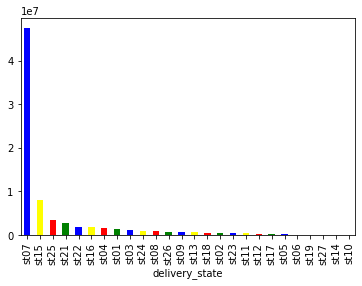

In [220]:
#plotagem da variável orders_valtot
orders_valtot.plot.bar(color = ['blue','yellow','red','green'])

In [221]:
#numero de ordens por estado
orders_num = orders.delivery_state.value_counts()
orders_num

st07    97820
st15    22286
st25     9174
st21     6894
st22     4595
st16     4346
st04     3447
st01     3407
st03     2579
st24     2155
st08     1924
st09     1869
st26     1802
st18     1432
st13     1269
st02      860
st11      859
st23      843
st12      336
st17      312
st05      183
st06       66
st27        5
st14        4
st19        3
st10        2
Name: delivery_state, dtype: int64

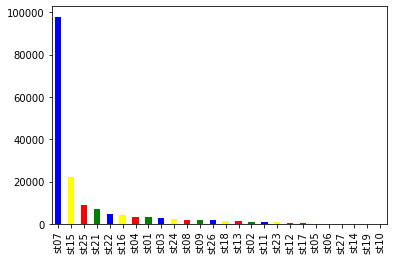

In [222]:
#plotagem da variável orders_num
orders_num.plot.bar(color = ['blue','yellow','red','green'])

Os estados que mais expedem pedidos são:st07    97820
st15    22286
st25     9174
st21     6894
st22     4595
st16     4346

In [223]:
orders['delivery_days'].describe()

count    89642.000000
mean         7.017938
std          6.855334
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max        165.000000
Name: delivery_days, dtype: float64

In [224]:
# substituir missing de acordo com a media por estado (aqui, usaremos inplace)
med = orders.groupby('delivery_state')['delivery_days'].transform('mean')
orders['delivery_days'].fillna(med, inplace=True)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,7.479536,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,7.479536,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.000000,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.000000,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,7.479536,st07,dv9,sc08


In [225]:
#Entendi que a coluna Installments não é importante, então vamos retirá-la
#orders.drop(['installments'],axis=1,inplace=True)

In [226]:
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,7.479536,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,7.479536,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.000000,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.000000,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,7.479536,st07,dv9,sc08


In [227]:
#verificando outliers na variavel price
orders['price'].describe()

count    168472.000000
mean        451.384291
std         857.769280
min       -8999.000000
25%          39.900000
50%         162.580000
75%         699.000000
max       25648.900000
Name: price, dtype: float64

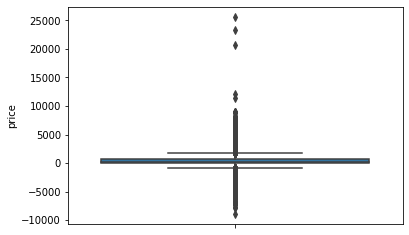

In [228]:
#Podemos observar que existem preços negativos, isso pode nos trazer uma informação: o cliente comprou e logo depois cancelou a compra
sns.boxplot(y='price', data = orders)

In [229]:
product.head()

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218


In [230]:
# verificando variáveis nulas de product
product.isnull().sum()

category_lv0    0
category_lv1    0
category_lv2    0
category_lv3    0
category_lv4    0
dtype: int64

## Limpeza & Pré-Processamento

Depois de explorar os dados brutos, é importante entender se já existem dados _outliers_ ou errados que corrompem ou invalidam certos registros (linhas da tabela) e que deveriam 1) serem tratados de alguma forma ou 2) eliminados do dataset. Se essa necessidade não surgiu com a EDA, das duas uma: ou não há realmente nada a fazer, ou é necessário explorar mais os dados pra entendê-los.

In [231]:
# substituir missing de acordo com a media por estado (aqui, usaremos inplace)
med = orders.groupby('delivery_state')['delivery_days'].transform('mean')
orders['delivery_days'].fillna(med, inplace=True)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,7.479536,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,7.479536,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.000000,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.000000,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,7.479536,st07,dv9,sc08


In [232]:
# Apagar preços menores que 1
indexprice = orders[ orders['price'] <= 1 ].index
# Delete these row indexes from dataFrame
orders.drop(indexprice , inplace=True)
orders

,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
order_id,,,,,,,,,,,
ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,7.479536,st07,dv9,sc08
ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,7.479536,st07,dv9,sc08
ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,7.479536,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...
ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.000000,st01,dv5,sc11
ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.000000,st01,dv5,sc11
ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,7.479536,st07,dv9,sc08


In [233]:
#verificando outliers na variavel price
orders['price'].describe()

count    148282.000000
mean        524.227629
std         770.649329
min           1.010000
25%          49.900000
50%         189.000000
75%         741.120000
max       25648.900000
Name: price, dtype: float64

In [234]:
#Fazendo merge entre os DataSets client_tr e orders
client_orders = pd.merge(clients_tr, orders,on='client_id', how='left')

In [235]:
client_orders

,client_id,birthdate,state,gender,is_churn,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
0,cx05072,1972-03-22,st25,cg2,False,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,7.479536,st07,dv9,sc08
1,cx05072,1972-03-22,st25,cg2,False,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,7.479536,st07,dv9,sc08
2,cx03836,1966-08-14,st15,cg1,False,px05603,2019-02-08 11:37:00,1.0,229.90,pm05,NaN,7.479536,st07,dv9,sc08
3,cx03836,1966-08-14,st15,cg1,False,px02764,2019-02-11 17:29:00,1.0,59.90,pm05,NaN,7.479536,st07,dv9,sc08
4,cx03836,1966-08-14,st15,cg1,False,px12381,2019-12-24 13:08:00,1.0,79.00,pm05,NaN,7.479536,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89033,cx00861,1980-06-01,st21,cg2,False,px03381,2019-07-27 14:16:00,1.0,793.98,pm05,NaN,7.479536,st07,dv9,sc08
89034,cx00861,1980-06-01,st21,cg2,False,px10549,2019-07-27 14:16:00,1.0,5.04,pm05,NaN,7.479536,st07,dv9,sc08
89035,cx00861,1980-06-01,st21,cg2,False,px11425,2019-07-27 14:16:00,1.0,99.00,pm05,NaN,7.479536,st07,dv9,sc08
89036,cx00861,1980-06-01,st21,cg2,False,px03347,2019-07-29 13:56:00,1.0,5.10,pm05,NaN,7.479536,st07,dv9,sc08


In [236]:
client_orders.isnull().sum()

client_id             0
birthdate             0
state                 0
gender                0
is_churn              0
product_id          126
datetime            126
units               126
price               126
payment_method      126
installments      68284
delivery_days       126
delivery_state      126
device              126
source              126
dtype: int64

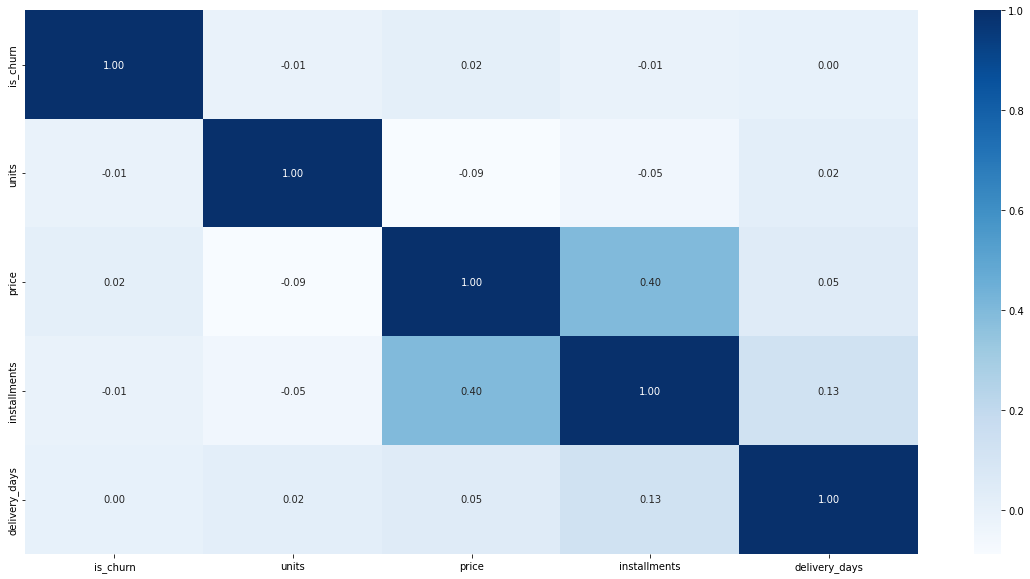

In [237]:
plt.figure(figsize=(20,10))
sns.heatmap(client_orders.corr(),annot=True,cmap='Blues',fmt='.2f')

## *Feature Engineering*

Essa é a etapa que pode dar mais trabalho, devido ao formato de eventos da **tabela de vendas**. Para facilitar um pouco, será dada a seguir uma sugestão de _feature engineering_. Caso haja uma vontade de incluir mais _features_, basta editar o código a seguir.


### Funções Auxiliares

Funções para ajudar nas diferentes ĩdéias de _feature engineering_.

In [238]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [239]:
class OrderAggregatorFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe base para FeaturesTransformers que usam os dados de Histórico de Vendas para extrair os dados.
    """
    
    def __init__(self, orders_table, columns=None, product_table=None, imputer=None):
        
        self.work_table = None
        if product_table is not None:
            self.refr_table = pd.merge(
                orders_table,
                product_table.reset_index(),
                on='product_id'
            )
        else:
            self.refr_table = orders_table.copy()
        if columns is not None:
            self.refr_table = self.refr_table[['client_id', *columns]]
        self._reset_database()
        self.imputer = imputer
        self.columns = columns

    def _reset_database(self):
        self.work_table = self.refr_table.copy()
        return self

    def _process_client(self, df):
        return df.set_index('client_id')

    def _select_orders(self, df):
        idx = self.work_table['client_id'].isin(df.index)
        return self.work_table[idx]

    def fit(self, X, y=None, **fit_params):
        if self.imputer is not None:
            self._reset_database()
            self.imputer.fit(self._select_orders(X)[self.columns])
            self.work_table.loc[:, self.columns] = self.imputer.transform(self.work_table[self.columns])
        return self
    
    def transform(self, X):
        return self._select_orders(X).groupby('client_id').apply(self._process_client)

In [240]:
class UniqueCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x.unique())).rename(index=lambda x: f'count_{x}')

In [241]:
class SumValuesTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.sum().rename(index=lambda x: f'sum_{x}')

In [242]:
class DistributionTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = (super()
               ._process_client(df)
               .describe()
               .drop(index='count')
               .rename(index=lambda c: c.replace('%', 'p')) 
               .rename(index={'mean': 'avg'})
               .unstack())
        tmp.index = tmp.index.map('_'.join)
        return tmp

In [243]:
class CountStateMatchesTransform(OrderAggregatorFeaturesTransform):
    
    def _process_client(self, df):
        tmp = df.set_index('client_id')[['state', 'delivery_state']]
        return pd.Series({
            'count_orders_states_eq': (tmp.state == tmp.delivery_state).sum(),
            'count_orders_states_ne': (tmp.state != tmp.delivery_state).sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

### Sugestão de Feature Engineering		

Algumas features interessantes para serem extraidas dos dados, por cliente, estão mostradas a seguir.

- `gender_g1`: __bool_ calculada a partir do `gender`
- `client_age`: calculada a partir do `birthdate`

- `sum_units`: total de itens comprados em 2019
- `sum_volume`: total gasto em compras em 2019

- `count_orders_states_ne`: quantidade de compras entregando em estados diferentes ao do cliente
- `count_orders_states_eq`: quantidade de compras entregando em estados iguais ao do cliente

- `count_product_id`: quantidade de produtos diferentes presentes nas compras
- `count_device`: quantidade de produtos diferentes presentes nas compras
- `count_source`: quantidade de produtos diferentes presentes nas compras
- `count_payment_method`: quantidade de meios de pagamento em compras

- `count_category_lv0`: quantidade de categorias diferentes (nível 0) em compras
- `count_category_lv1`: quantidade de categorias diferentes (nível 1) em compras
- `count_category_lv2`: quantidade de categorias diferentes (nível 2) em compras
- `count_category_lv3`: quantidade de categorias diferentes (nível 3) em compras
- `count_category_lv4`: quantidade de categorias diferentes (nível 4) em compras

- `price_avg`: média dos preços pagos em cada item comprado
- `price_std`: desvio padrão dos preços pagos em cada item comprado
- `price_min`: mínimo dos preços pagos em cada item comprado
- `price_25p`: quartil 25% dos preços pagos em cada item comprado
- `price_50p`: quartil 50% dos preços pagos em cada item comprado
- `price_75p`: quartil 75% dos preços pagos em cada item comprado
- `price_max`: máximo dos preços pagos em cada item comprado

- `delivery_days_avg`: média da quantidade de dias para entregar (prazo)
- `delivery_days_std`: desvio padrão da quantidade de dias para entregar (prazo)
- `delivery_days_min`: mínimo da quantidade de dias para entregar (prazo)
- `delivery_days_25p`: quartil 25% da quantidade de dias para entregar (prazo)
- `delivery_days_50p`: quartil 50% da quantidade de dias para entregar (prazo)
- `delivery_days_75p`: quartil 75% da quantidade de dias para entregar (prazo)
- `delivery_days_max`: máximo da quantidade de dias para entregar (prazo)

- `installments_avg`: média da quantidade de parcelas de pagamento
- `installments_std`: desvio padrão da quantidade de parcelas de pagamento
- `installments_min`: mínimo da quantidade de parcelas de pagamento
- `installments_25p`: quartil 25% da quantidade de parcelas de pagamento
- `installments_50p`: quartil 50% da quantidade de parcelas de pagamento
- `installments_75p`: quartil 75% da quantidade de parcelas de pagamento
- `installments_max`: máximo da quantidade de parcelas de pagamento

In [244]:
class FeatureEngineeringTransform(BaseEstimator, TransformerMixin):

    def __init__(self, orders_table, product_table):
        orders_table['volume'] = orders_table.units * orders_table.price
        self._transf_sum = SumValuesTransform(orders_table=orders_table, columns=['units', 'volume'])
        self._transf_stt = CountStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state']])
        self._transf_cnt = UniqueCounterTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['product_id', 'device', 'source', 'payment_method', 
                     'category_lv0', 'category_lv1', 'category_lv2', 'category_lv3', 'category_lv4']
        )
        self._transf_dst_med = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['price', 'delivery_days'],
            imputer=SimpleImputer(strategy='median')
        )
        self._transf_dst_one = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['installments'],
            imputer=SimpleImputer(strategy='constant', fill_value=1)
        )
        
    def fit(self, X, y=None, **fit_params): 
        self._transf_dst_med.fit(X)
        self._transf_dst_one.fit(X)
        return self
    
    def transform(self, X):
        output = (X[['gender']] == 'cg1').rename(columns={'gender': 'gender_cg1'})
        output['client_age'] = 2021 - X.birthdate.dt.year
        output = output.join(self._transf_sum.transform(X))
        output = output.join(self._transf_stt.transform(X))
        output = output.join(self._transf_cnt.transform(X))
        output = output.join(self._transf_dst_med.transform(X))
        output = output.join(self._transf_dst_one.transform(X))
        return output

In [247]:
%%time
feateng = FeatureEngineeringTransform(orders, product).fit(clients_tr)

CPU times: user 644 ms, sys: 16.7 ms, total: 661 ms
Wall time: 666 ms


In [248]:
feateng

AttributeError: ignored

TypeError: ignored

In [249]:
%%time
train_dataset = feateng.transform(clients_tr)

CPU times: user 6min 54s, sys: 5.6 s, total: 6min 59s
Wall time: 6min 51s


In [250]:
train_dataset.to_csv('data/client.train.features.v1.csv')

In [251]:
%%time
test_dataset = feateng.transform(clients_te)

CPU times: user 2min 17s, sys: 1.85 s, total: 2min 19s
Wall time: 2min 16s


In [252]:
test_dataset.to_csv('data/client.test.features.v1.sv')

## Análise Exploratória nas Novas _Features_


Regra de Ouro aqui: **cada vez que forem criadas _features_** nas etapas de _feature engineering_, deve ser feita uma **análise exploratória** para entender as distribuições dos dados. Novos dados trazem novos ângulos para  o problema e esses novos ângulos quase sempre trazem novas informações sobre o problema.

Importante: se fizer sentido, pode-se adicionar mais uma etapa de **limpeza e pré-processamento** dos dados.

In [253]:
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_std,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,False,49,2.0,119.80,0.0,2.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx03836,True,55,6.0,625.72,0.0,5.0,5.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx08472,True,67,3.0,2832.92,0.0,3.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx12946,True,66,1.0,69.90,0.0,1.0,1.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,1.0,NaN,1.0,1.0,1.0,1.0,1.0
cx19045,False,63,14.0,794.84,1.0,12.0,13.0,2.0,2.0,1.0,...,7.479536,7.479536,7.479536,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,40,4.0,1038.02,0.0,3.0,3.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx02434,False,24,1.0,1952.90,0.0,1.0,1.0,1.0,1.0,1.0,...,2.000000,2.000000,2.000000,10.0,NaN,10.0,10.0,10.0,10.0,10.0
cx16024,True,71,4.0,1158.00,0.0,3.0,3.0,1.0,1.0,1.0,...,7.479536,9.239768,11.000000,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [254]:
train_dataset.dtypes

gender_cg1                   bool
client_age                  int64
sum_units                 float64
sum_volume                float64
count_orders_states_eq    float64
count_orders_states_ne    float64
count_product_id          float64
count_device              float64
count_source              float64
count_payment_method      float64
count_category_lv0        float64
count_category_lv1        float64
count_category_lv2        float64
count_category_lv3        float64
count_category_lv4        float64
price_avg                 float64
price_std                 float64
price_min                 float64
price_25p                 float64
price_50p                 float64
price_75p                 float64
price_max                 float64
delivery_days_avg         float64
delivery_days_std         float64
delivery_days_min         float64
delivery_days_25p         float64
delivery_days_50p         float64
delivery_days_75p         float64
delivery_days_max         float64
installments_a

In [255]:
train_dataset.isnull().sum()

gender_cg1                   0
client_age                   0
sum_units                  126
sum_volume                 126
count_orders_states_eq     126
count_orders_states_ne     126
count_product_id           126
count_device               126
count_source               126
count_payment_method       126
count_category_lv0         126
count_category_lv1         126
count_category_lv2         126
count_category_lv3         126
count_category_lv4         126
price_avg                  126
price_std                 5476
price_min                  126
price_25p                  126
price_50p                  126
price_75p                  126
price_max                  126
delivery_days_avg          126
delivery_days_std         5476
delivery_days_min          126
delivery_days_25p          126
delivery_days_50p          126
delivery_days_75p          126
delivery_days_max          126
installments_avg           126
installments_std          5476
installments_min           126
installm

In [256]:
#Removendo as colunas com muitos nulos 
train_dataset.drop(['price_std','delivery_days_std','installments_std' ],axis=1,inplace=True)

In [257]:
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_25p,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,False,49,2.0,119.80,0.0,2.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx03836,True,55,6.0,625.72,0.0,5.0,5.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx08472,True,67,3.0,2832.92,0.0,3.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx12946,True,66,1.0,69.90,0.0,1.0,1.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx19045,False,63,14.0,794.84,1.0,12.0,13.0,2.0,2.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,40,4.0,1038.02,0.0,3.0,3.0,1.0,1.0,1.0,...,6.739768,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx02434,False,24,1.0,1952.90,0.0,1.0,1.0,1.0,1.0,1.0,...,2.000000,2.000000,2.000000,2.000000,10.0,10.0,10.0,10.0,10.0,10.0
cx16024,True,71,4.0,1158.00,0.0,3.0,3.0,1.0,1.0,1.0,...,7.479536,7.479536,9.239768,11.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [258]:
train_dataset.isnull().sum()

gender_cg1                  0
client_age                  0
sum_units                 126
sum_volume                126
count_orders_states_eq    126
count_orders_states_ne    126
count_product_id          126
count_device              126
count_source              126
count_payment_method      126
count_category_lv0        126
count_category_lv1        126
count_category_lv2        126
count_category_lv3        126
count_category_lv4        126
price_avg                 126
price_min                 126
price_25p                 126
price_50p                 126
price_75p                 126
price_max                 126
delivery_days_avg         126
delivery_days_min         126
delivery_days_25p         126
delivery_days_50p         126
delivery_days_75p         126
delivery_days_max         126
installments_avg          126
installments_min          126
installments_25p          126
installments_50p          126
installments_75p          126
installments_max          126
dtype: int

In [259]:
#removendo os nulos
train_dataset = train_dataset.dropna()

In [260]:
train_dataset.isnull().sum()

gender_cg1                0
client_age                0
sum_units                 0
sum_volume                0
count_orders_states_eq    0
count_orders_states_ne    0
count_product_id          0
count_device              0
count_source              0
count_payment_method      0
count_category_lv0        0
count_category_lv1        0
count_category_lv2        0
count_category_lv3        0
count_category_lv4        0
price_avg                 0
price_min                 0
price_25p                 0
price_50p                 0
price_75p                 0
price_max                 0
delivery_days_avg         0
delivery_days_min         0
delivery_days_25p         0
delivery_days_50p         0
delivery_days_75p         0
delivery_days_max         0
installments_avg          0
installments_min          0
installments_25p          0
installments_50p          0
installments_75p          0
installments_max          0
dtype: int64

In [261]:
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_25p,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,False,49,2.0,119.80,0.0,2.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx03836,True,55,6.0,625.72,0.0,5.0,5.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx08472,True,67,3.0,2832.92,0.0,3.0,2.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx12946,True,66,1.0,69.90,0.0,1.0,1.0,1.0,1.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx19045,False,63,14.0,794.84,1.0,12.0,13.0,2.0,2.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,40,4.0,1038.02,0.0,3.0,3.0,1.0,1.0,1.0,...,6.739768,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx02434,False,24,1.0,1952.90,0.0,1.0,1.0,1.0,1.0,1.0,...,2.000000,2.000000,2.000000,2.000000,10.0,10.0,10.0,10.0,10.0,10.0
cx16024,True,71,4.0,1158.00,0.0,3.0,3.0,1.0,1.0,1.0,...,7.479536,7.479536,9.239768,11.000000,1.0,1.0,1.0,1.0,1.0,1.0


In [262]:
#lista uma contagem por genero
age = train_dataset.client_age.value_counts()
age

40     729
39     723
35     720
36     719
38     718
      ... 
90       1
92       1
104      1
94       1
95       1
Name: client_age, Length: 87, dtype: int64

In [263]:
#verificando outlier na idade
train_dataset['client_age'].describe()

count    23166.000000
mean        44.228568
std         13.692987
min         11.000000
25%         34.000000
50%         42.000000
75%         53.750000
max        121.000000
Name: client_age, dtype: float64

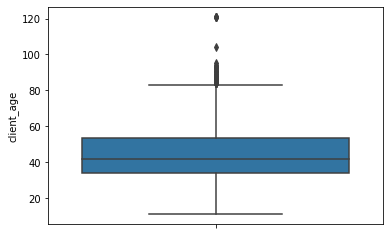

In [264]:
#Podemos observar que existem pessoas com mais 121 anos
sns.boxplot(y='client_age', data = train_dataset)

In [266]:
#Fazendo merge entre os DataSets client_tr e orders
data_train1 = pd.merge(clients_tr, train_dataset,on='client_id', how='left')

In [267]:
data_train1

,birthdate,state,gender,is_churn,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,...,delivery_days_25p,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,1972-03-22,st25,cg2,False,False,49.0,2.0,119.80,0.0,2.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx03836,1966-08-14,st15,cg1,False,True,55.0,6.0,625.72,0.0,5.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx08472,1954-08-07,st15,cg1,False,True,67.0,3.0,2832.92,0.0,3.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx12946,1955-11-16,st15,cg1,False,True,66.0,1.0,69.90,0.0,1.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx19045,1958-10-25,st15,cg2,False,False,63.0,14.0,794.84,1.0,12.0,...,7.479536,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False,True,40.0,4.0,1038.02,0.0,3.0,...,6.739768,7.479536,7.479536,7.479536,1.0,1.0,1.0,1.0,1.0,1.0
cx02434,1997-03-15,st04,cg2,False,False,24.0,1.0,1952.90,0.0,1.0,...,2.000000,2.000000,2.000000,2.000000,10.0,10.0,10.0,10.0,10.0,10.0
cx16024,1950-10-09,st11,cg1,False,True,71.0,4.0,1158.00,0.0,3.0,...,7.479536,7.479536,9.239768,11.000000,1.0,1.0,1.0,1.0,1.0,1.0


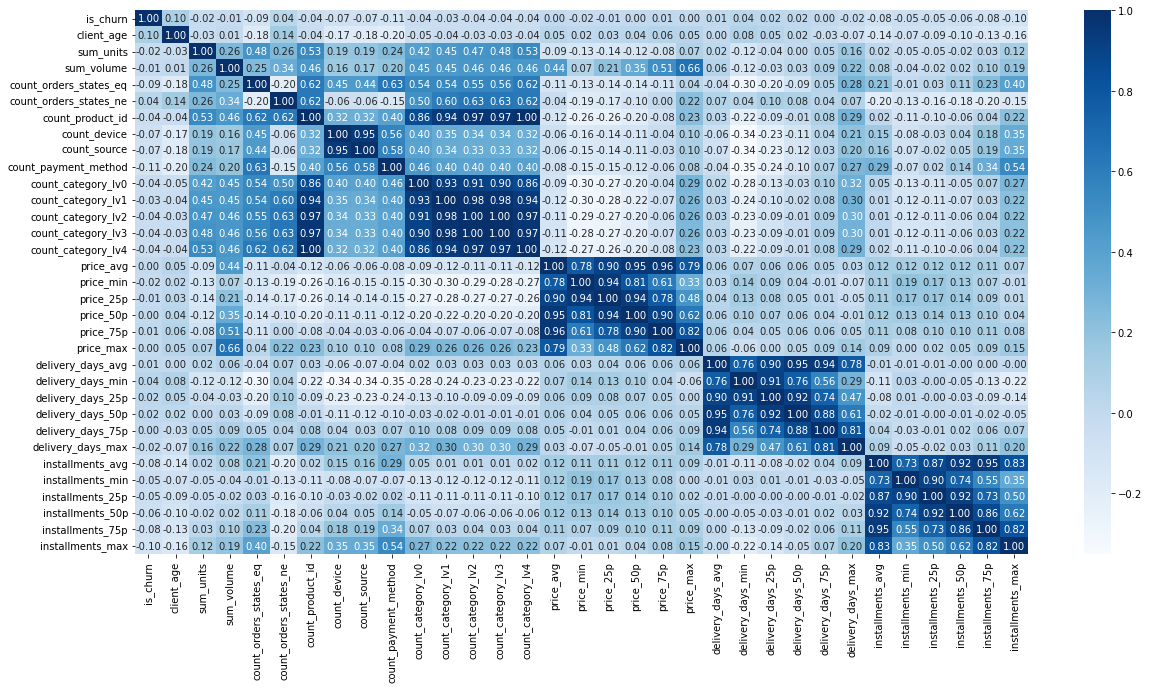

In [268]:
#plotando matriz de correlação
plt.figure(figsize=(20,10))
sns.heatmap(data_train1.corr(),annot=True,cmap='Blues',fmt='.2f')

In [270]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23292 entries, cx05072 to cx00861
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   birthdate               23292 non-null  datetime64[ns]
 1   state                   23292 non-null  object        
 2   gender                  23292 non-null  object        
 3   is_churn                23292 non-null  bool          
 4   gender_cg1              23166 non-null  object        
 5   client_age              23166 non-null  float64       
 6   sum_units               23166 non-null  float64       
 7   sum_volume              23166 non-null  float64       
 8   count_orders_states_eq  23166 non-null  float64       
 9   count_orders_states_ne  23166 non-null  float64       
 10  count_product_id        23166 non-null  float64       
 11  count_device            23166 non-null  float64       
 12  count_source            23166 non-null  flo

## Treinar um Modelo Baseline

Antes de começar a treinar modelos muito complexos, sempre é interessante verificar **se um modelo mais simples já resolve**. Além da vantagem de adquirir mais conhecimento sobre o problema, com modelos simples como [árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) ou uma boa [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) trazem bons insights sobre o que o modelo aprendeu sobre o problema durante  o treinamento. Com sorte, também é possível ter maior compreensao sobre o **impacto direto de cada _feature_** na decisão de saída do modelo, trazendo uma dimensão de explicabilidade para a solução.


O modelo baseline deve ser avaliado em termos de performance de classificação usando métricas como **F-Score**, **precision**, **recall** e _frameworks_ de avaliação como a **matriz de confusão** e a **curva ROC**. Essas medidas **devem ser colocadas em uma tabela** identificada na primeira linha como **_benchmark_** para que, cada vez que se treinar outro modelo, esse modelo possa ser comparado nessas mesmas métricas com os outros. Um exemplo de tabela de comparação de resultados de modelos está [nessa aula de Balanceamento de _Datasets_](https://docs.google.com/presentation/d/1Y4ORsMqnlP2mYbYG30JwHl_VkIGB0XBdO_D8LmK1OAw/edit?usp=sharing) no **slide 124**.


Importantíssimo: deve-se **sempre verificar se houve _overfit_ ou _underfit_** no treinamento. Uma forma fácil de fazer isso é **comparando métricas de treino e de teste** do mesmo modelo treinado. Assim, fica fácil entender se é necessário resolver problemas de **viés** ou de **variância** nas próximas iterações da construção da solução. 


Um último lembrete: **sempre comparar modelos sobre a mesma massa de teste**. Por esse motivo, o desafio já fornece os dados de teste em um arquivo separado, mas é importantíssimo comparar modelos diferentes sobre o **teste**, que na teoria é um _proxy_ do funcionamento do modleo no mundo real.

In [2]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.3 MB/s 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib
import plotly.express as px
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from category_encoders.target_encoder import TargetEncoder



import warnings

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")

In [ ]:
regressao = smf.ols ('is_churn ~ AreaConstruida + Bairro_encoder + Qualidade_encoder + ArCentral_encoder + TotalBanheiros + CarrosGaragem',  data = df2).fit()

## Treinar Modelos mais Complexos

Após treinar um modelo **_baseline_** e comprender se o problema tem questões de **viés** ou de **variância** (ou ambos) a serem resolvidos, a idéia é treinar modelos mais complexos (e mais fortes) para maximizar a performance da solução. Como os modelos clássicos de _ensemble_ conseguem resolver esses tipos de problemas (e são modelos complexos por si), fica como sugestão a referência da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing), que sugere os tipos certos de modelos para cada problema.

Algumas sugestões de modelos a serem treinados:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): _ensemble_ de árvores de decisão do tipo **_bagging_**, diminuem **variância**
- [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): _ensemble_ de árvores de decisão do tipo **_boosting_**, diminuem **variância** e **viés**
- [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html): modelo com foco na otimização da separação entre as classes, muito eficientes em classificação binária

Lembrando de sempre armazenar na **tabela de resultados** as métricas de cada modelo treinado.


In [ ]:
''' Espaço reservado para a Solução '''

## Agrupando Modelos em um *Ensemble*

Com vários modelos treinados, é interessante treinar um [_ensemble_ do tipo _stacking_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) com os modelos mais promissores dentre os treinados. 


Antes de treinar o _stacking_, deve-se buscar entender **quais modelos são interessantes** para compor esse _ensemble_, já que há bastante custo computacional envolvido em combinar modelos. Uma técnica interessante é **verificar quais modelos são mais complementares** e qual combinação de modelos teria o **potencial ótimo**, i.e. o maior ganho teórico. A primeira parte da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing) mostra esse racional no **slide 22**.




In [ ]:
''' Espaço reservado para a Solução '''

## Envio das Previsões do Desafio

Após o treinamento, é interessante fazer uma análise da **tabela de resultados** atualizada e compreender a evolução das soluções. Depois, **escolher a melhor solução** e enviar os resultados do modelo sobre os dados em `clients.challenge` para a competição de modelos por [esse formulário]().

O **formato do arquivo** que deve ser submetido é uma tabela com duas colunas:
- `client_id`: todos os IDs de cliente do arquivo *clients.challenge.csv*
- `is_churn`: decisão sobre cada cliente; apenas será aceito o formato binário, com saída igual a `True` ou `False`.

**IMPORTANTE**: por limitações do formulário, o arquivo deve ter extensão `.txt` se for do tipo CSV ou `xls` (ou `xlsx`) se for uma planilha do excel.

In [ ]:
''' Espaço reservado para a Solução '''

## Insights & Levantamento de Hipóteses

Durante o desenvolvimento das soluções e as explorações, é muito provável que alguns _insights_ e hipóteses tenham surgido. Nessa última etapa é o momento de escrever eses pontos de forma estruturada e preparar o **banco de hipóteses** para mais uma rodada de solução. Afinal, se há espaço para melhoras, esse banco pode ser uma fonte de boas idéias de onde começar.

- Teste github 

In [ ]:
#Testando Git